In [157]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import neighbors
from sklearn import svm
import numpy as np
import os
tmp_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(tmp_path, os.pardir))

In [37]:
df = pd.read_excel(parent_dir+"\data\Returns_Export.xlsx")

In [38]:
df.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
0,2021-12-14,Baby Wasserspielzeug Addmos Badespielzeug Spie...,9.99,07-08009-64134,Verkauf,0,0,9.99,265.0,23.0,B083DQH3DY,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
1,2021-05-13,Pokemon Sun & Moon Theme Deck Pack Waldschatte...,9.99,16-07049-22699,Verkauf,0,0,9.99,265.0,23.0,B01MZ6A8YO,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
2,2021-09-20,Spielpuppe Enchantimals GNP16 Schneemann Sharl...,9.99,19-07627-72302,Verkauf,0,0,9.99,265.0,23.0,B084L11FCZ,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
3,2021-04-15,Schlagzeug Colorbaby Spielzeug Kinder Musik In...,9.99,17-06905-72218,Verkauf,0,0,9.99,265.0,23.0,B07X4ZGCPQ,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0
4,2021-06-14,Ravensburger tiptoi 00737 Schatzsuche in der B...,9.99,08-07202-18906,Verkauf,0,0,9.99,265.0,23.0,B00V8KE8N6,Toy,265.0,BWare,Used,1.0,3.0,No,False,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183257 entries, 0 to 183256
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   redatum                    183257 non-null  datetime64[ns]
 1   artikelbeschreibung        183257 non-null  object        
 2   verkaufspreis              183257 non-null  float64       
 3   platformspecificorderid    183257 non-null  object        
 4   VK                         183257 non-null  object        
 5   Erstattungstyp             183243 non-null  object        
 6   Erstattungsart             183243 non-null  object        
 7   Artikelpreis inkl Versand  183257 non-null  float64       
 8   User_Id                    178475 non-null  float64       
 9   Vendor_Id                  178474 non-null  float64       
 10  Asin                       177029 non-null  object        
 11  Category                   178475 non-null  object  

In [40]:
df.describe

<bound method NDFrame.describe of           redatum                                artikelbeschreibung  \
0      2021-12-14  Baby Wasserspielzeug Addmos Badespielzeug Spie...   
1      2021-05-13  Pokemon Sun & Moon Theme Deck Pack Waldschatte...   
2      2021-09-20  Spielpuppe Enchantimals GNP16 Schneemann Sharl...   
3      2021-04-15  Schlagzeug Colorbaby Spielzeug Kinder Musik In...   
4      2021-06-14  Ravensburger tiptoi 00737 Schatzsuche in der B...   
...           ...                                                ...   
183252 2021-10-25  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183253 2021-10-25  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183254 2021-10-26  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183255 2021-10-28  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   
183256 2021-10-29  Druckerpapier Kopierpapier A4 80g/m² weiß, all...   

        verkaufspreis platformspecificorderid       VK Erstattungstyp  \
0                9.99       

In [41]:
refunds = df.loc[(df["Erstattungsart"] != 0) & (df["Erstattungsart"] != "NaN")]

In [42]:
refunds.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
134534,2021-08-25,RockJam E-Gitarren-Set in Standardgröße E-Gita...,35.50,05-07518-23081,Verkauf,NaN,NaN,54.723077,226.0,23.0,B01M66OZ0V,MusicInstruments,226.0,Damage,Used,2.0,3.0,No,False,0.0
134535,2021-08-25,Akustikgitarre MSA Gitarre Instrument 4/4 Größ...,15.15,05-07518-23081,Verkauf,NaN,NaN,34.373077,314.0,23.0,B01N6C6PJ3,MusicInstruments,314.0,Acceptable,Used,0.0,0.0,No,False,0.0
134536,2021-08-25,E-Gitarre RockJam Gitarre Saiteninstrument Sun...,53.88,05-07518-23081,Verkauf,NaN,NaN,73.103077,314.0,23.0,B01M6ZH0AW,MusicInstruments,314.0,NonFunctional,Used,1.0,0.0,No,False,0.0
134537,2021-08-25,Akustikgitarre Gitarre Martin Smith Akustik In...,20.50,05-07518-23081,Verkauf,NaN,NaN,39.723077,314.0,23.0,B00UOUK4IE,MusicInstruments,314.0,Damage,Used,1.0,2.0,No,False,0.0
134538,2021-06-07,ReNr 441799 ReNr 439035 EGitarre Display4top R...,25.00,05-07133-60124,Verkauf,Teilerstattung (TE),Defekt,25.000000,314.0,23.0,B0863H39LF,MusicInstruments,314.0,VeryGood,Used,2.0,0.0,No,False,0.0


In [66]:
refunds.dropna(inplace=True)

c:\Development\Anwendungsfelder_Business_Analytics\.venv\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [137]:
refunds.shape

(18817, 20)

In [67]:
refunds.head()

,redatum,artikelbeschreibung,verkaufspreis,platformspecificorderid,VK,Erstattungstyp,Erstattungsart,Artikelpreis inkl Versand,User_Id,Vendor_Id,Asin,Category,client_condition_user_id,Condition,Item_State,Accessory_Complete,OVP,Repaired,Case_Swap,Seal_Sticker_Damaged
134538,2021-06-07,ReNr 441799 ReNr 439035 EGitarre Display4top R...,25.0,05-07133-60124,Verkauf,Teilerstattung (TE),Defekt,25.0,314.0,23.0,B0863H39LF,MusicInstruments,314.0,VeryGood,Used,2.0,0.0,No,False,0.0
134540,2021-01-12,ReNr 396232 ReNr 390034 Gaming Headset Astro A...,125.9,18-06280-86579,Verkauf,Retoure (RS),Defekt,125.9,150.0,23.0,B07TTB3SR2,VideoGames,150.0,NonFunctional,Used,1.0,1.0,No,False,0.0
134547,2022-03-21,ReNr 535089 Sitzbank Stagg PBH-780 BK P V/BK K...,30.0,15-08390-32712,Verkauf,Teilerstattung (TE),Defekt,30.0,351.0,23.0,B0064UUYYM,MusicInstruments,351.0,LikeNew,Used,1.0,4.0,No,False,0.0
134550,2022-01-24,ReNr 522075 Controller Turtle Beach Recon Weiß...,0.0,27-08155-81914,Ersatz,Ersatz,Ersatz,0.0,324.0,23.0,B0977KM6S7,VideoGames,324.0,VeryGood,Used,1.0,1.0,No,False,0.0
134551,2022-03-29,ReNr 537473 Kohlendioxid Tester Innenraum Dete...,0.0,13-08435-16229,Ersatz,Ersatz,Ersatz,0.0,268.0,23.0,B08F2F756X,HomeImprovement,324.0,Damage,Used,1.0,2.0,No,False,0.0


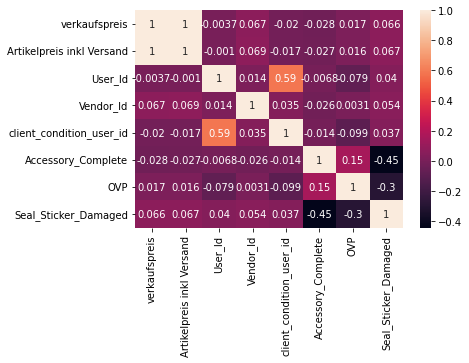

In [68]:
corrMatrix = refunds.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [144]:
print(refunds.Category.unique())

['MusicInstruments' 'VideoGames' 'HomeImprovement' 'VideoGamesAccessories'
 'OfficeProduct' 'HomeEntertainment' 'ElectronicAccessories'
 'ComputerAccessories' 'Toy' 'PersonalComputer' 'Wireless'
 'HealthPersonalCare' 'Electronics' 'Drugstore' 'Beauty' 'AutoPart'
 'Tools' 'AutomotivePartsandAccessories' 'Jewelry' 'Luggage'
 'SportOutdoor' 'Watch' 'SchoolStationeryOfficeSupplies' 'CameraPhoto'
 'PetProducts' 'Music' 'VideoGamesConsoles' 'Clothing' 'PhoneAccessory'
 'Kitchen' 'Home' 'LawnPatioGarden' 'GiftCard' 'BabyProduct' 'Movies'
 'KitchenHousehold' 'SportingGoods' 'BuildingCenter' 'OutdoorLiving'
 'Navigation' 'BISS' 'SoundAndRecordingEquipment' 'Hobbies' 'Grocery'
 'Smartphones' 'Books' 'AutoAccessory' 'Tablets'
 'CommercialIndustrialScience' 'DigitalVideoGames' 'LargeAppliances'
 'Shoes' 'Furniture' 'Lighting' 'Video' 'PortableDevices' 'MobilePhones'
 'Software' 'MotorcyclePart']


In [96]:
print(refunds.Item_State.unique())

['Used' 'New']


In [97]:
print(refunds.Accessory_Complete.unique())

[2. 1. 0.]


In [98]:
print(refunds.OVP.unique())

[0. 1. 4. 2. 3.]


In [99]:
print(refunds.Repaired.unique())

['No' 'Yes' 'NotTried' 'ToRepair' 'Tried']


In [100]:
print(refunds.Case_Swap.unique())

[False]


In [101]:
print(refunds.Seal_Sticker_Damaged.unique())

[0. 1.]


# Preprocessing

In [165]:
#X = refunds[["verkaufspreis", "User_Id", "Asin", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
X = refunds[["verkaufspreis", "User_Id", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Seal_Sticker_Damaged"]]
#X = refunds[["verkaufspreis", "User_Id", "Category", "Condition"]]
#X = refunds[["verkaufspreis", "User_Id", "Category", "Condition"]]
y = refunds["Erstattungstyp"]
X["verkaufspreis"] = np.sqrt(X["verkaufspreis"]**2)

C:\Users\Daniel\AppData\Local\Temp/ipykernel_9812/1916770780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["verkaufspreis"] = np.sqrt(X["verkaufspreis"]**2)


In [166]:
label_encoder_category = preprocessing.LabelEncoder()
X["Category"] = label_encoder_category.fit_transform(X["Category"])
label_encoder_condition = preprocessing.LabelEncoder()
X["Condition"] = label_encoder_category.fit_transform(X["Condition"])
label_encoder_state = preprocessing.LabelEncoder()
X["Item_State"] = label_encoder_state.fit_transform(X["Item_State"])
label_encoder_repaird = preprocessing.LabelEncoder()
X["Repaired"] = label_encoder_repaird.fit_transform(X["Repaired"])

C:\Users\Daniel\AppData\Local\Temp/ipykernel_9812/173916742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Category"] = label_encoder_category.fit_transform(X["Category"])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_9812/173916742.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Condition"] = label_encoder_category.fit_transform(X["Condition"])
C:\Users\Daniel\AppData\Local\Temp/ipykernel_9812/173916742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

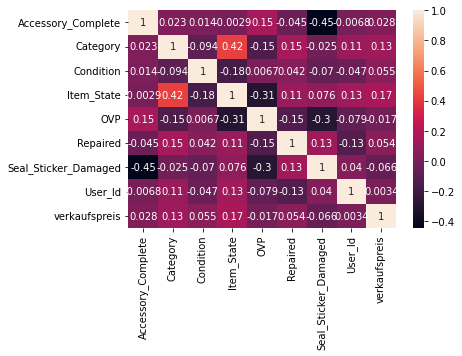

In [167]:
frames = [X, y]
df_corr = pd.concat(frames)
corrMatrix = df_corr.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [168]:
ordinal = preprocessing.OrdinalEncoder()
#ordinal.fit_transform(X=X[["Asin", "Category", "Condition", "Item_State", "Accessory_Complete", "OVP", "Repaired", "Case_Swap", "Seal_Sticker_Damaged"]])

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [170]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 8, min_samples_leaf=20, random_state=1)
clf_tree = clf_tree.fit(X_train, y_train)
print(clf_tree.score(X_test, y_test))

0.8597423510466988


In [171]:
clf_forest = ensemble.RandomForestClassifier(max_depth = 21, min_samples_leaf=20, random_state=1)
clf_forest = clf_forest.fit(X_train, y_train)
print(clf_forest.score(X_test, y_test))

0.8296296296296296


In [172]:
clf_knn = neighbors.KNeighborsClassifier()
clf_knn = clf_knn.fit(X_train, y_train)
print(clf_knn.score(X_test, y_test))

0.7661835748792271


In [173]:
clf_svm = svm.SVC(random_state=1)
clf_svm = clf_svm.fit(X_train, y_train)
print(clf_svm.score(X_test, y_test))

0.7473429951690821


In [174]:
print(X_test.iloc[1])


verkaufspreis            60.0
User_Id                 314.0
Category                 35.0
Condition                 3.0
Item_State                1.0
Accessory_Complete        1.0
OVP                       3.0
Repaired                  0.0
Seal_Sticker_Damaged      0.0
Name: 147187, dtype: float64


In [175]:
print(clf_forest.predict_proba(X_test))

[[0.00000000e+00 3.55824411e-02 9.38709301e-01 2.57082576e-02]
 [0.00000000e+00 2.88722675e-02 9.43813693e-01 2.73140391e-02]
 [7.06288143e-03 8.95312946e-02 2.07219139e-02 8.82683910e-01]
 ...
 [0.00000000e+00 2.81404120e-02 9.24601882e-01 4.72577063e-02]
 [0.00000000e+00 3.31811856e-02 9.29752884e-01 3.70659306e-02]
 [5.75438596e-04 3.22373241e-01 1.89771842e-01 4.87279478e-01]]


In [176]:
X_test.iloc[-1]

verkaufspreis           11.59
User_Id                 36.00
Category                55.00
Condition                1.00
Item_State               1.00
Accessory_Complete       1.00
OVP                      2.00
Repaired                 0.00
Seal_Sticker_Damaged     0.00
Name: 136896, dtype: float64